In [14]:
# Step 1: Import libraries (these are tools that help us work with data)
import pandas as pd  # For working with data tables
import numpy as np   # For math operations
from datetime import datetime, timedelta
import random

# Step 2: Create sample e-commerce sales data
np.random.seed(42)  # This makes our random data consistent

# Create dates for 2 years
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(730)]

# Product categories
categories = ['Electronics', 'Clothing', 'Home & Garden', 'Books', 'Toys', 'Sports']
products = {
    'Electronics': ['Laptop', 'Smartphone', 'Headphones', 'Tablet', 'Smart Watch'],
    'Clothing': ['T-Shirt', 'Jeans', 'Jacket', 'Shoes', 'Dress'],
    'Home & Garden': ['Lamp', 'Chair', 'Plant Pot', 'Rug', 'Mirror'],
    'Books': ['Fiction Novel', 'Cookbook', 'Biography', 'Science Book', 'Self-Help'],
    'Toys': ['Action Figure', 'Board Game', 'Puzzle', 'Doll', 'LEGO Set'],
    'Sports': ['Yoga Mat', 'Dumbbells', 'Tennis Racket', 'Basketball', 'Running Shoes']
}

# Regions
regions = ['North', 'South', 'East', 'West']

# Generate 5000 transactions
data = []
for _ in range(5000):
    date = random.choice(dates)
    category = random.choice(categories)
    product = random.choice(products[category])
    region = random.choice(regions)
    quantity = random.randint(1, 10)

    # Price varies by category
    if category == 'Electronics':
        price = random.uniform(200, 1500)
    elif category == 'Clothing':
        price = random.uniform(20, 150)
    elif category == 'Home & Garden':
        price = random.uniform(30, 300)
    elif category == 'Books':
        price = random.uniform(10, 50)
    elif category == 'Toys':
        price = random.uniform(15, 100)
    else:  # Sports
        price = random.uniform(25, 200)

    revenue = quantity * price

    # Add some missing values (realistic data often has gaps)
    if random.random() < 0.02:  # 2% missing customer IDs
        customer_id = None
    else:
        customer_id = f"CUST{random.randint(1000, 9999)}"

    data.append({
        'Order_ID': f"ORD{_+1:05d}",
        'Date': date,
        'Customer_ID': customer_id,
        'Product': product,
        'Category': category,
        'Region': region,
        'Quantity': quantity,
        'Unit_Price': round(price, 2),
        'Revenue': round(revenue, 2)
    })

# Create DataFrame (think of it as an Excel spreadsheet in Python)
df = pd.DataFrame(data)

# Save to CSV file
df.to_csv('ecommerce_sales_data.csv', index=False)

print("Dataset created successfully!")
print(f"Total records: {len(df)}")
print("\nFirst 5 rows:")
print(df.head())

Dataset created successfully!
Total records: 5000

First 5 rows:
   Order_ID       Date Customer_ID        Product       Category Region  \
0  ORD00001 2022-04-22    CUST7343  Fiction Novel          Books   East   
1  ORD00002 2023-08-28    CUST5236         Laptop    Electronics   East   
2  ORD00003 2023-09-03    CUST1767      Biography          Books   West   
3  ORD00004 2023-02-06    CUST9036  Running Shoes         Sports   West   
4  ORD00005 2023-04-28    CUST9327         Mirror  Home & Garden   East   

   Quantity  Unit_Price  Revenue  
0         2       48.82    97.63  
1         2      294.45   588.91  
2         8       33.82   270.59  
3         4      140.13   560.52  
4         5      204.27  1021.33  


In [13]:
# Step 3: Data Cleaning and Exploration

# Load the data
df = pd.read_csv('ecommerce_sales_data.csv')

# Convert Date to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# Fill missing Customer_IDs with "UNKNOWN"
df['Customer_ID'] = df['Customer_ID'].fillna('UNKNOWN')

# Create additional useful columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Quarter'] = df['Date'].dt.quarter
df['Day_of_Week'] = df['Date'].dt.day_name()

# Save cleaned data
df.to_csv('ecommerce_sales_cleaned.csv', index=False)

print("Data cleaned and new columns added!")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows of cleaned data:")
print(df.head())

Missing Values:
Order_ID         0
Date             0
Customer_ID    116
Product          0
Category         0
Region           0
Quantity         0
Unit_Price       0
Revenue          0
dtype: int64


Data cleaned and new columns added!

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     5000 non-null   str           
 1   Date         5000 non-null   datetime64[us]
 2   Customer_ID  5000 non-null   str           
 3   Product      5000 non-null   str           
 4   Category     5000 non-null   str           
 5   Region       5000 non-null   str           
 6   Quantity     5000 non-null   int64         
 7   Unit_Price   5000 non-null   float64       
 8   Revenue      5000 non-null   float64       
 9   Year         5000 non-null   int32         
 10  Month        5000 non-null   int32         
 11  Month_Nam

In [12]:
# Step 4: Data Analysis

import pandas as pd

# Load the cleaned data
df = pd.read_csv('ecommerce_sales_cleaned.csv')

# Make sure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 1. TOTAL REVENUE ANALYSIS
print("="*50)
print("KEY METRICS")
print("="*50)

total_revenue = df['Revenue'].sum()
total_orders = len(df)
avg_order_value = df['Revenue'].mean()
total_customers = df['Customer_ID'].nunique()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${avg_order_value:,.2f}")
print(f"Total Customers: {total_customers:,}")
print("\n")

# 2. REVENUE BY CATEGORY
print("="*50)
print("REVENUE BY CATEGORY")
print("="*50)

category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print(category_revenue)
print("\n")

# 3. REVENUE BY REGION
print("="*50)
print("REVENUE BY REGION")
print("="*50)

region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print(region_revenue)
print("\n")

# 4. TOP SELLING PRODUCTS
print("="*50)
print("TOP 10 PRODUCTS BY REVENUE")
print("="*50)

top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)
print("\n")

# 5. MONTHLY REVENUE TREND
print("="*50)
print("MONTHLY REVENUE TREND")
print("="*50)

# Create Year-Month column for better grouping
df['Year_Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Year_Month')['Revenue'].sum()
print(monthly_revenue)
print("\n")

# 6. ADDITIONAL INSIGHTS
print("="*50)
print("ADDITIONAL INSIGHTS")
print("="*50)

# Average quantity per order
avg_quantity = df['Quantity'].mean()
print(f"Average Quantity per Order: {avg_quantity:.2f}")

# Most popular category by number of orders
category_orders = df['Category'].value_counts()
print(f"\nMost Popular Category (by orders): {category_orders.index[0]} ({category_orders.iloc[0]} orders)")

# Revenue by Year
yearly_revenue = df.groupby('Year')['Revenue'].sum()
print(f"\nRevenue by Year:")
print(yearly_revenue)

print("\nAnalysis complete!")

KEY METRICS
Total Revenue: $5,933,198.33
Total Orders: 5,000
Average Order Value: $1,186.64
Total Customers: 3,770


REVENUE BY CATEGORY
Category
Electronics      3871064.36
Home & Garden     744673.83
Sports            533780.43
Clothing          383537.35
Toys              270979.13
Books             129163.23
Name: Revenue, dtype: float64


REVENUE BY REGION
Region
East     1542939.42
West     1506175.35
North    1462619.66
South    1421463.90
Name: Revenue, dtype: float64


TOP 10 PRODUCTS BY REVENUE
Product
Laptop         908157.46
Smart Watch    798922.67
Headphones     739281.28
Smartphone     717030.80
Tablet         707672.15
Mirror         157390.64
Chair          151929.95
Plant Pot      146461.70
Lamp           145570.64
Rug            143320.90
Name: Revenue, dtype: float64


MONTHLY REVENUE TREND
Year_Month
2022-01    175302.97
2022-02    285513.46
2022-03    234374.87
2022-04    136621.23
2022-05    285271.29
2022-06    235718.69
2022-07    288906.28
2022-08    208250.21

Data loaded successfully

Creating visualizations...

Creating Chart 1: Revenue by Category...
Saved: revenue_by_category.png


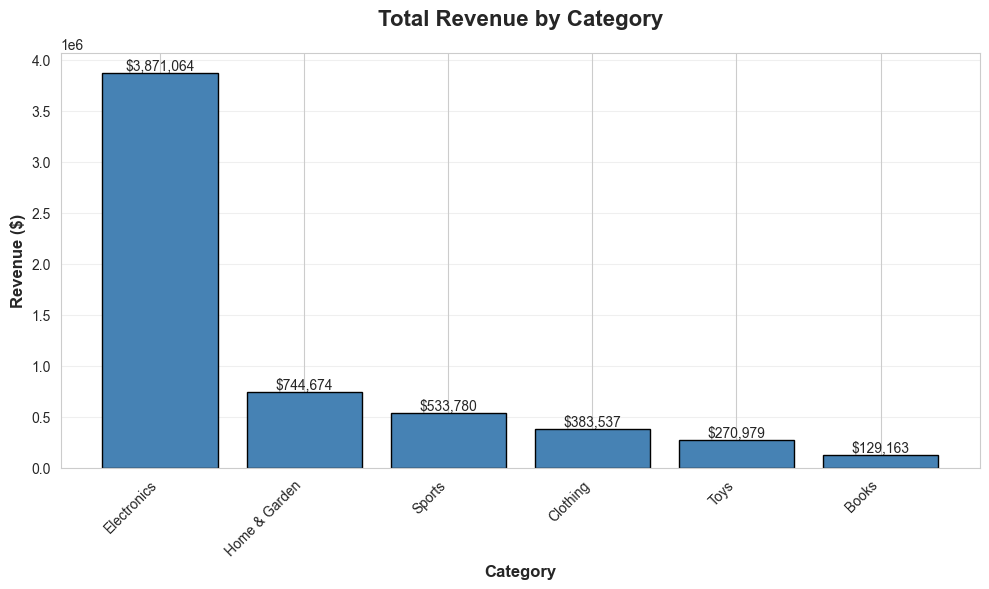


Creating Chart 2: Revenue by Region...
Saved: revenue_by_region.png


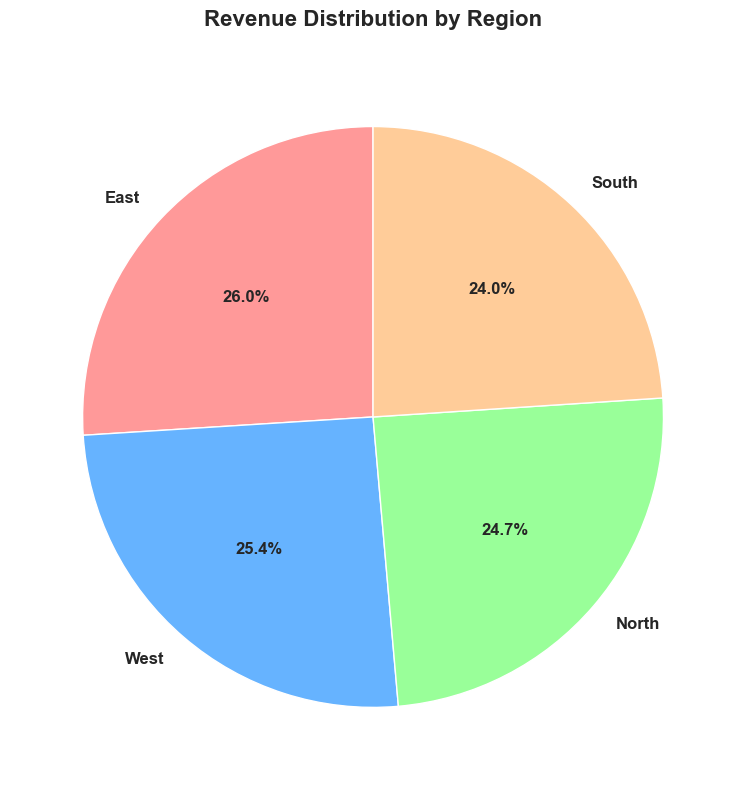


Creating Chart 3: Monthly Revenue Trend...
Saved: monthly_trend.png


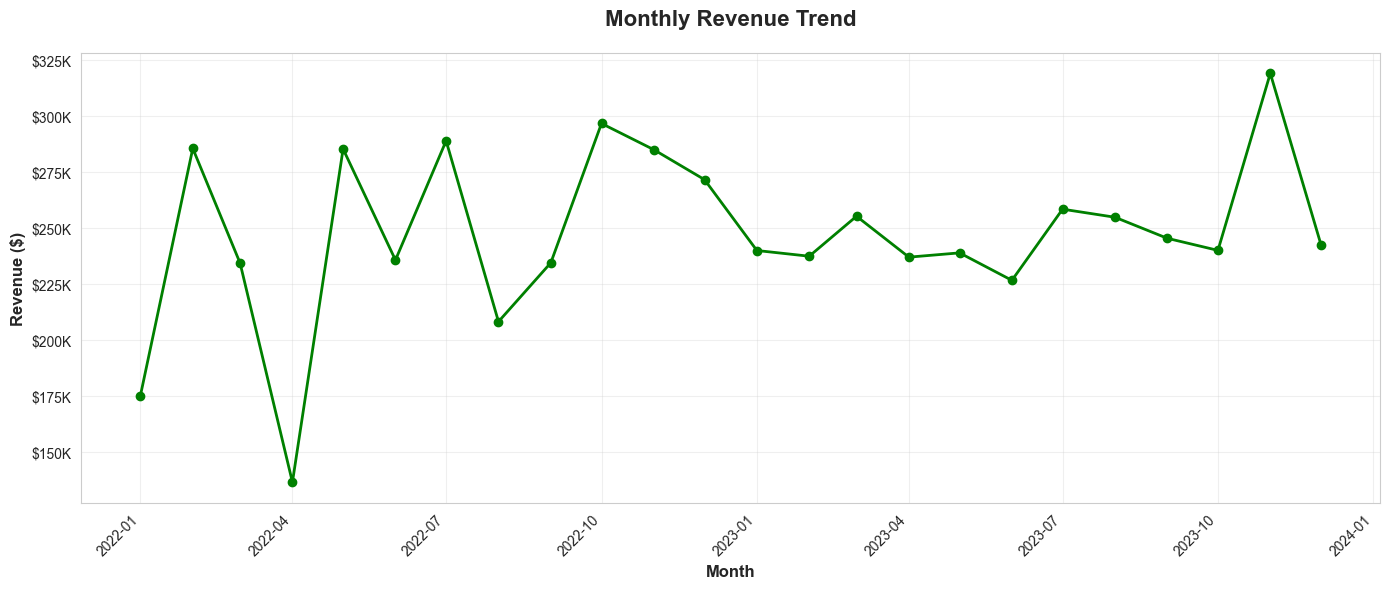


Creating Chart 4: Top 10 Products...
Saved: top_products.png


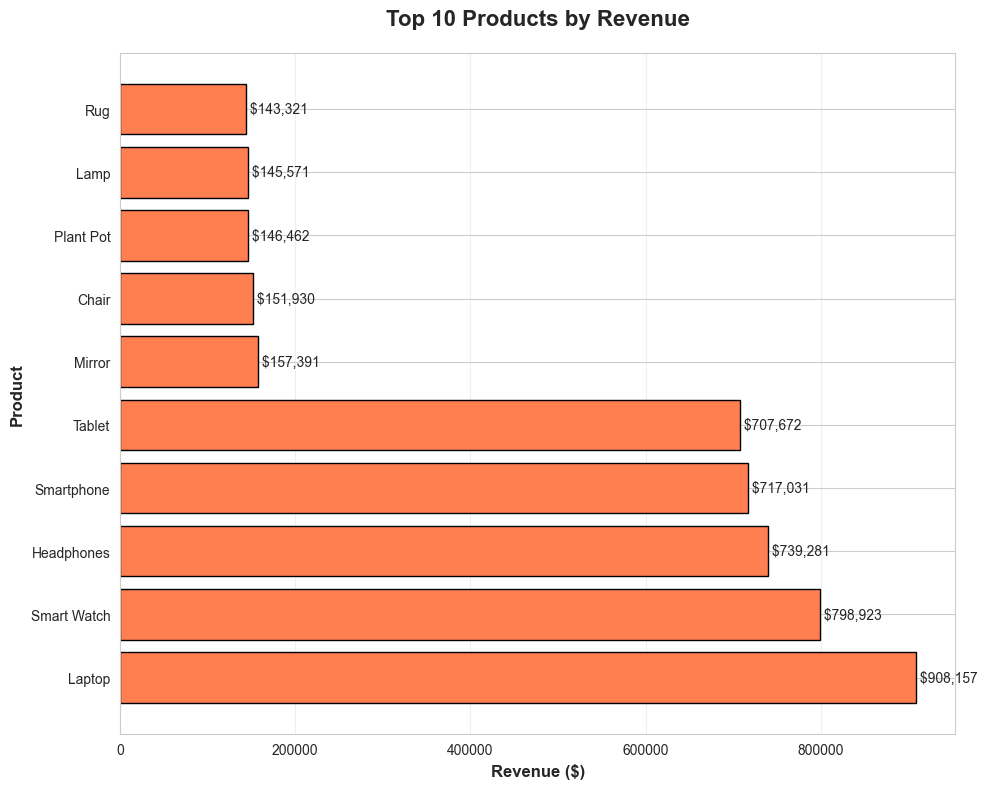


All 4 visualizations created and saved successfully!

Saved files:
  1. revenue_by_category.png
  2. revenue_by_region.png
  3. monthly_trend.png
  4. top_products.png


In [10]:
# Step 5: Data Visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
try:
    df = pd.read_csv('ecommerce_sales_cleaned.csv')
    print("Data loaded successfully")
except:
    df = pd.read_csv('ecommerce_sales_data.csv')
    print("Using original data file")

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate aggregations for charts
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)

print("\nCreating visualizations...\n")

# ==========================================
# 1. REVENUE BY CATEGORY (Bar Chart)
# ==========================================
print("Creating Chart 1: Revenue by Category...")
plt.figure(figsize=(10, 6))
bars = plt.bar(category_revenue.index, category_revenue.values, color='steelblue', edgecolor='black')
plt.title('Total Revenue by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('revenue_by_category.png', dpi=300, bbox_inches='tight')
print("Saved: revenue_by_category.png")
plt.show()
plt.close()

# ==========================================
# 2. REVENUE BY REGION (Pie Chart)
# ==========================================
print("\nCreating Chart 2: Revenue by Region...")
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(region_revenue.values, labels=region_revenue.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Revenue Distribution by Region', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('revenue_by_region.png', dpi=300, bbox_inches='tight')
print("Saved: revenue_by_region.png")
plt.show()
plt.close()

# ==========================================
# 3. MONTHLY REVENUE TREND (Line Chart)
# ==========================================
print("\nCreating Chart 3: Monthly Revenue Trend...")
# Group by month
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('YearMonth')['Revenue'].sum()

# Convert index to timestamps for plotting
monthly_dates = monthly_trend.index.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(monthly_dates, monthly_trend.values, marker='o', linewidth=2,
         markersize=6, color='green', label='Monthly Revenue')
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('monthly_trend.png', dpi=300, bbox_inches='tight')
print("Saved: monthly_trend.png")
plt.show()
plt.close()

# ==========================================
# 4. TOP 10 PRODUCTS (Horizontal Bar Chart)
# ==========================================
print("\nCreating Chart 4: Top 10 Products...")
plt.figure(figsize=(10, 8))
bars = plt.barh(top_products.index, top_products.values, color='coral', edgecolor='black')
plt.title('Top 10 Products by Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_products.values)):
    plt.text(value, i, f' ${value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('top_products.png', dpi=300, bbox_inches='tight')
print("Saved: top_products.png")
plt.show()
plt.close()

print("\n" + "="*60)
print("All 4 visualizations created and saved successfully!")
print("="*60)
print("\nSaved files:")
print("  1. revenue_by_category.png")
print("  2. revenue_by_region.png")
print("  3. monthly_trend.png")
print("  4. top_products.png")

In [20]:
# Step 6: Create Summary Report

import pandas as pd

# Load the data
try:
    df = pd.read_csv('ecommerce_sales_cleaned.csv')
    print("Data loaded successfully")
except:
    df = pd.read_csv('ecommerce_sales_data.csv')
    print("Using original data file")

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate all metrics
print("\nCalculating metrics...")

total_revenue = df['Revenue'].sum()
total_orders = len(df)
avg_order_value = df['Revenue'].mean()
total_customers = df['Customer_ID'].nunique()

# Get top performers
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

# Get date range
start_date = df['Date'].min()
end_date = df['Date'].max()

# Create the summary report
summary = f"""
{'='*70}
E-COMMERCE SALES ANALYSIS REPORT
{'='*70}

ANALYSIS PERIOD: {start_date.strftime('%B %d, %Y')} to {end_date.strftime('%B %d, %Y')}

{'='*70}
KEY FINDINGS:
{'='*70}

1. OVERALL PERFORMANCE
   - Total Revenue: ${total_revenue:,.2f}
   - Total Orders: {total_orders:,}
   - Average Order Value: ${avg_order_value:,.2f}
   - Total Unique Customers: {total_customers:,}

2. TOP PERFORMING CATEGORY
   - {category_revenue.index[0]}: ${category_revenue.iloc[0]:,.2f}
   - This represents {category_revenue.iloc[0]/total_revenue*100:.1f}% of total revenue

3. BEST REGION
   - {region_revenue.index[0]}: ${region_revenue.iloc[0]:,.2f}
   - This represents {region_revenue.iloc[0]/total_revenue*100:.1f}% of total revenue

4. BEST SELLING PRODUCT
   - {top_products.index[0]}: ${top_products.iloc[0]:,.2f}

5. CATEGORY BREAKDOWN
"""

# Add all categories
for i, (category, revenue) in enumerate(category_revenue.items(), 1):
    summary += f"   {i}. {category}: ${revenue:,.2f} ({revenue/total_revenue*100:.1f}%)\n"

summary += f"""
6. REGIONAL BREAKDOWN
"""

# Add all regions
for i, (region, revenue) in enumerate(region_revenue.items(), 1):
    summary += f"   {i}. {region}: ${revenue:,.2f} ({revenue/total_revenue*100:.1f}%)\n"

summary += f"""
{'='*70}
RECOMMENDATIONS:
{'='*70}

1. MARKETING FOCUS
   - Increase marketing budget for {category_revenue.index[0]} category
   - This category shows the highest revenue potential

2. REGIONAL STRATEGY
   - Expand operations in {region_revenue.index[0]} region
   - This region shows the strongest performance

3. PRODUCT PROMOTION
   - Feature {top_products.index[0]} prominently in marketing campaigns
   - This is the top revenue-generating product

4. IMPROVEMENT OPPORTUNITIES
   - Investigate lower performance in {region_revenue.index[-1]} region
   - Consider targeted campaigns to boost sales in underperforming areas

5. CUSTOMER INSIGHTS
   - Average order value is ${avg_order_value:.2f}
   - Consider strategies to increase order value (bundling, upselling)

{'='*70}
Report generated on: {pd.Timestamp.now().strftime('%B %d, %Y at %I:%M %p')}
{'='*70}
"""

# Save the report
with open('analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("Report saved as 'analysis_report.txt'")

# Display the report
print("\n" + "="*70)
print("PREVIEW OF THE REPORT:")
print("="*70)
print(summary)

print("\n" + "="*70)
print("Report creation complete!")
print("="*70)

Data loaded successfully

Calculating metrics...
Report saved as 'analysis_report.txt'

PREVIEW OF THE REPORT:

E-COMMERCE SALES ANALYSIS REPORT

ANALYSIS PERIOD: January 01, 2022 to December 31, 2023

KEY FINDINGS:

1. OVERALL PERFORMANCE
   - Total Revenue: $5,933,198.33
   - Total Orders: 5,000
   - Average Order Value: $1,186.64
   - Total Unique Customers: 3,770

2. TOP PERFORMING CATEGORY
   - Electronics: $3,871,064.36
   - This represents 65.2% of total revenue

3. BEST REGION
   - East: $1,542,939.42
   - This represents 26.0% of total revenue

4. BEST SELLING PRODUCT
   - Laptop: $908,157.46

5. CATEGORY BREAKDOWN
   1. Electronics: $3,871,064.36 (65.2%)
   2. Home & Garden: $744,673.83 (12.6%)
   3. Sports: $533,780.43 (9.0%)
   4. Clothing: $383,537.35 (6.5%)
   5. Toys: $270,979.13 (4.6%)
   6. Books: $129,163.23 (2.2%)

6. REGIONAL BREAKDOWN
   1. East: $1,542,939.42 (26.0%)
   2. West: $1,506,175.35 (25.4%)
   3. North: $1,462,619.66 (24.7%)
   4. South: $1,421,463.90 (2

In [18]:
# Step 7: Prepare data for Tableau

import pandas as pd

# Load the cleaned data
df = pd.read_csv('ecommerce_sales_cleaned.csv')

# Make sure Date is in the right format
df['Date'] = pd.to_datetime(df['Date'])

# Create a final version for Tableau with all necessary columns
tableau_df = df.copy()

# Verify all columns are present
print("Columns in your Tableau data:")
print(tableau_df.columns.tolist())

print(f"\nTotal rows: {len(tableau_df)}")
print(f"Date range: {tableau_df['Date'].min()} to {tableau_df['Date'].max()}")

# Save as CSV for Tableau
tableau_df.to_csv('tableau_data.csv', index=False)

print("\nData prepared and saved as 'tableau_data.csv'")
print("You're ready to import this into Tableau Public!")

Columns in your Tableau data:
['Order_ID', 'Date', 'Customer_ID', 'Product', 'Category', 'Region', 'Quantity', 'Unit_Price', 'Revenue', 'Year', 'Month', 'Month_Name', 'Quarter', 'Day_of_Week']

Total rows: 5000
Date range: 2022-01-01 00:00:00 to 2023-12-31 00:00:00

Data prepared and saved as 'tableau_data.csv'
You're ready to import this into Tableau Public!


Dashboard saved as 'python_dashboard.png'


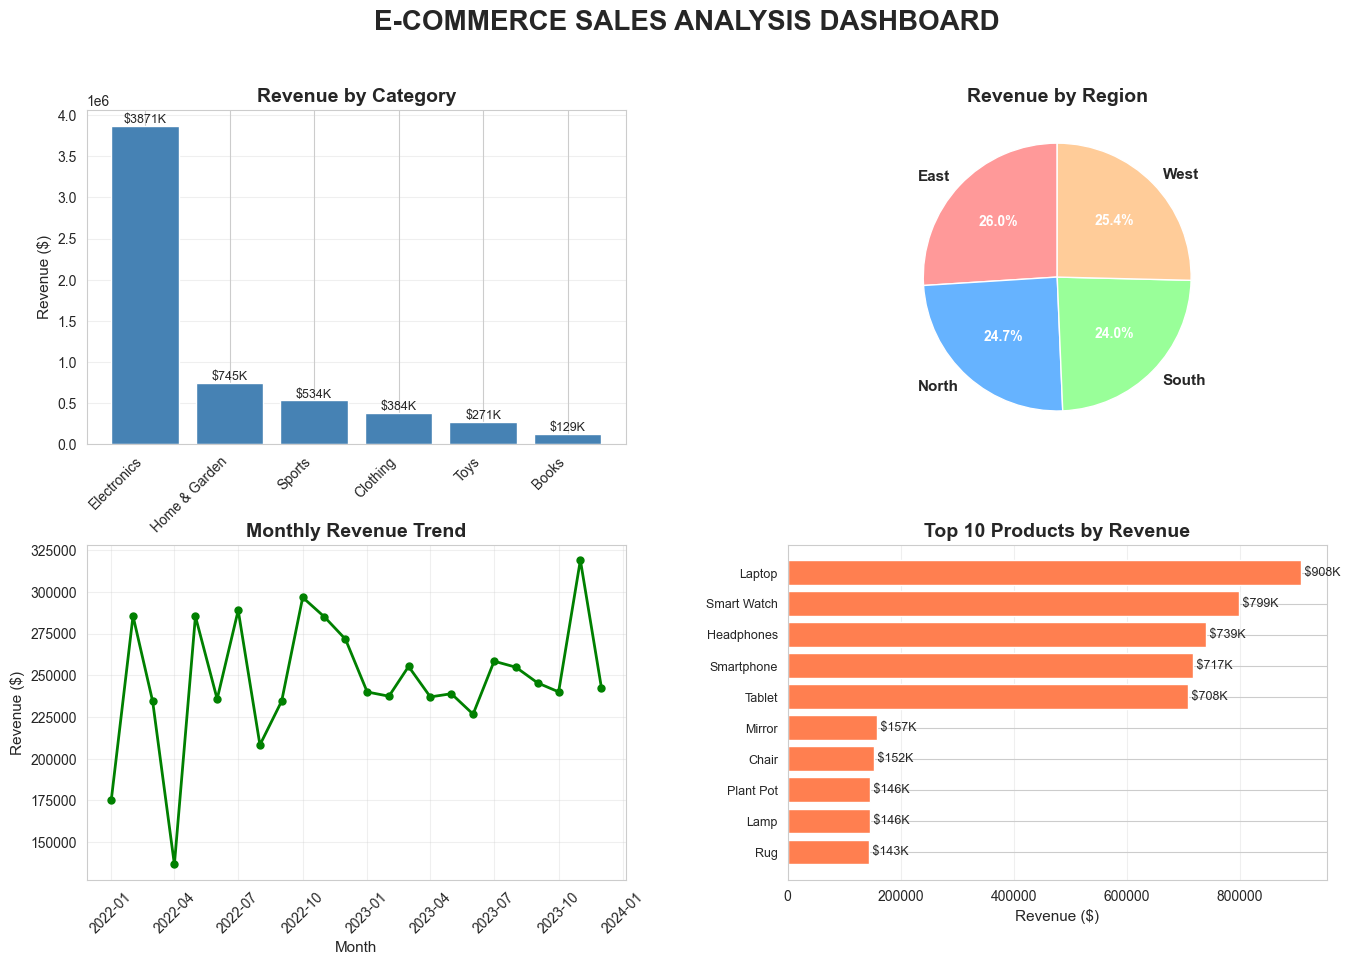


DASHBOARD CREATED SUCCESSFULLY!

We now have:
  1. python_dashboard.png - A complete dashboard image
  2. All individual charts from Step 5


In [19]:
# Alternative Step 7: Create Interactive Dashboard in Python

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Load data
df = pd.read_csv('ecommerce_sales_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

# Create a figure with 4 subplots (2x2 grid)
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

# Add main title
fig.suptitle('E-COMMERCE SALES ANALYSIS DASHBOARD',
             fontsize=20, fontweight='bold', y=0.98)

# ==========================================
# SUBPLOT 1: Revenue by Category
# ==========================================
ax1 = fig.add_subplot(gs[0, 0])
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
bars1 = ax1.bar(range(len(category_revenue)), category_revenue.values, color='steelblue')
ax1.set_xticks(range(len(category_revenue)))
ax1.set_xticklabels(category_revenue.index, rotation=45, ha='right')
ax1.set_title('Revenue by Category', fontsize=14, fontweight='bold')
ax1.set_ylabel('Revenue ($)', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1000:.0f}K', ha='center', va='bottom', fontsize=9)

# ==========================================
# SUBPLOT 2: Revenue by Region
# ==========================================
ax2 = fig.add_subplot(gs[0, 1])
region_revenue = df.groupby('Region')['Revenue'].sum()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts = ax2.pie(region_revenue.values, labels=region_revenue.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Revenue by Region', fontsize=14, fontweight='bold')
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# ==========================================
# SUBPLOT 3: Monthly Revenue Trend
# ==========================================
ax3 = fig.add_subplot(gs[1, 0])
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('YearMonth')['Revenue'].sum()
monthly_dates = monthly_trend.index.to_timestamp()

ax3.plot(monthly_dates, monthly_trend.values, marker='o', linewidth=2,
         markersize=5, color='green')
ax3.set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Revenue ($)', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# ==========================================
# SUBPLOT 4: Top 10 Products
# ==========================================
ax4 = fig.add_subplot(gs[1, 1])
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
bars4 = ax4.barh(range(len(top_products)), top_products.values, color='coral')
ax4.set_yticks(range(len(top_products)))
ax4.set_yticklabels(top_products.index, fontsize=9)
ax4.set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
ax4.set_xlabel('Revenue ($)', fontsize=11)
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars4, top_products.values)):
    ax4.text(value, i, f' ${value/1000:.0f}K', va='center', fontsize=9)

# Invert y-axis so highest is on top
ax4.invert_yaxis()

# Save the dashboard
plt.tight_layout()
plt.savefig('python_dashboard.png', dpi=300, bbox_inches='tight')
print("Dashboard saved as 'python_dashboard.png'")
plt.show()

print("\n" + "="*70)
print("DASHBOARD CREATED SUCCESSFULLY!")
print("="*70)
print("\nWe now have:")
print("  1. python_dashboard.png - A complete dashboard image")
print("  2. All individual charts from Step 5")
print("="*70)